In [57]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize,scale
import matplotlib.pyplot as plt
%matplotlib inline 

# Logistic Regression using Sklearn package 

In [40]:
Iris = datasets.load_iris() # Iris dataset 
Iris_Data = Iris.data       # extract Iris data
Iris_Target = Iris.target   # extract Iris targets

data = Iris_Data[:100,:]     # Extract 2 class data instead of the 3 class
target = Iris_Target[:100]   # Extract 2 class target instead of the 3 class

normalized_data = normalize(data, norm = 'l2') #Normalize the data
standarized_data = scale(data) #Standarize the data

lr = LogisticRegression()        # Initialize the logistic regression model 
lr.fit(standarized_data,target)  # train the model

predictedLabels = lr.predict(standarized_data) # test the model on the training data
# print a report about classification performance 
print (metrics.classification_report(target,predictedLabels)) 
# Print confusion matrix 
print (metrics.confusion_matrix(target,predictedLabels))
print 'Coefficients: {v}\n'.format(v = lr.coef_) # Print weights 
print 'Bias: {v} \n'.format(v = lr.intercept_)   # print bias

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]
Coefficients: [[ 0.81091424 -1.16601465  1.52533197  1.5428075 ]]

Bias: [ 0.10503024] 



# Activation Functions 

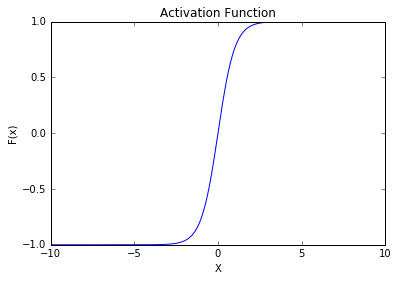

In [72]:
class ActivationFunctions (object):
    """
    This class generates different well-knwon activation functions
    x : is the data to apply the activation function on it.
    Defaukt value is np.linspace(-10,10,1000)
    """
    
    def __init__ (self,x = np.linspace(-10,10,1000)):
        self.data = x
        self.y = self.Sigmoid()
    
    def Sigmoid(self):
        self.y = 1.0 / (1+np.exp(-self.data))
        return self.y
    
    def ReLU(self):
        self.y = np.maximum(0,self.data)
        return self.y
    
    def Tanh(self):
        self.y = np.tanh(self.data)
        return self.y
    
    def UnitStep(self):
        self.y = np.where(self.data>=0 , 1,0)
        return self.y
    
    def DrawActivationFunction (self):
        plt.plot(self.data,self.y)
        plt.title ('Activation Function')
        plt.xlabel('X')
        plt.ylabel('F(x)')
    
activationFn = ActivationFunctions()
y = activationFn.Tanh()
activationFn.DrawActivationFunction()

# Cost Functions

In [75]:
class CostFunctions (object):
    
    def __init__ (self, target=[], predictedLabels=[]):
        self.target = target
        self.predictedLabels = predictedLabels
    
    def NLL (self):
        pass
    
    def MSE (self):
        pass
    
    def CrossEntropy(self):
        pass

# Cost Gradients

In [96]:
class CostGradientFunctions (object):
    
    def __init__ (self, target=[], data=[], weights=[]):
        self.data = data
        slef.target = target
        slef.weights = weights
    
    def NLLGradient (self):
        pass
    
    def MSEGradient (self):
        pass
    
    def CrossEntropyGradient(self):
        pass

# Weight Update Rules

In [112]:
class WeightUpdateRules (object):
    
    def __init__ (self,data=[],target=[],weights=[],batchSize=1,eta=0.01,epochs = 100):
        self.target = target  
        self.data = data
        self.weights = weights
        self.batchSize = batchSize
        self.eta = eta
        self.epochs = epochs
        slef.costError = []
        #slef.activationFn = ActivationFunctions()
        #self.costFn = CostFunctions()
        #self.costGradientFn = CostGradientFunctions()
        
    def GD (self):
        for _ in np.arange(epochs):
            z = NetInput(self.data,self.weights)
            activationFn = ActivationFunctions(x=z)
            yPredicted = activationFn.Sigmoid()
            costGradientFn = CostGradientFunctions()
            costGradient = costGradientFn.NLLGradient()
            costErrorFn = CostFunctions()
            costErr = costErrorFn.NLL()
            self.costError.push(costErr)
            self.weights += self.eta*costGradient         
            
    def SGD (self):
        for _ in np.arange(epochs):
            costErr = 0
            for record in self.data:
                z = NetInput(record,self.weights)
                activationFn = ActivationFunctions(x=z)
                yPredicted = activationFn.Sigmoid()
                costGradientFn = CostGradientFunctions()
                costGradient = costGradientFn.NLLGradient()
                costErrorFn = CostFunctions()
                costErr += costErrorFn.NLL()
                self.weights += self.eta*costGradient
                
            self.costError.push(costErr)
    
    def BatchSGD (self):
        for _ in np.arange(epochs):
            costErr = 0
            for batch in batches:
                z = NetInput(batch,self.weights)
                activationFn = ActivationFunctions(x=z)
                yPredicted = activationFn.Sigmoid()
                costGradientFn = CostGradientFunctions()
                costGradient = costGradientFn.NLLGradient()
                costErrorFn = CostFunctions()
                costErr += costErrorFn.NLL()
                self.weights += self.eta*costGradient
                
            self.costError.push(costErr)
    
    def NetInput (self,x,w):
        return np.dot(x,w)
    
    def iter_minibatches(self):
    # Provide chunks one by one
    chunkstartmarker = 0
    while chunkstartmarker < numtrainingpoints:
        chunkrows = range(chunkstartmarker,chunkstartmarker+chunksize)
        X_chunk, y_chunk = getrows(chunkrows)
        yield X_chunk, y_chunk
        chunkstartmarker += chunksize

# Logistic Regression using plain python

In [110]:
class LogisticRegression2 (object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def fit (slef,data, target):
        pass
    
    def predict (self,z):
        np.where (z>0.5,1,0)
    
    def NetInput (self,x,w):
        return np.dot(x,w)
    
    def PlotCostError(self):
        pass

# Test LogisticRegression2

In [106]:
Iris = datasets.load_iris() # Iris dataset 
Iris_Data = Iris.data       # extract Iris data
Iris_Target = Iris.target   # extract Iris targets

data = Iris_Data[:100,:]     # Extract 2 class data instead of the 3 class
target = Iris_Target[:100]   # Extract 2 class target instead of the 3 class

normalized_data = normalize(data, norm = 'l2') #Normalize the data
standarized_data = scale(data) #Standarize the data
